Available cities: ['Taipei', 'Taoyuan', 'Hsinchu', 'Miaoli', 'Taichung', 'Changhua', 'Nantou', 'Yunlin', 'Chiayi', 'Tainan', 'Kaohsiung']


Enter the start city:  Taipei
Enter the destination city:  Changhua


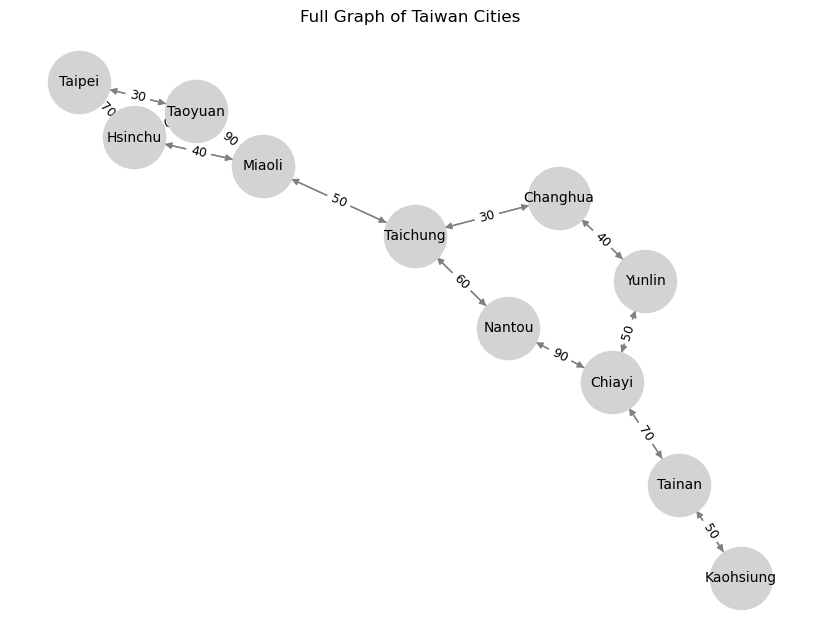

Shortest Path Cost: 190
Path: Taipei -> Hsinchu -> Miaoli -> Taichung -> Changhua


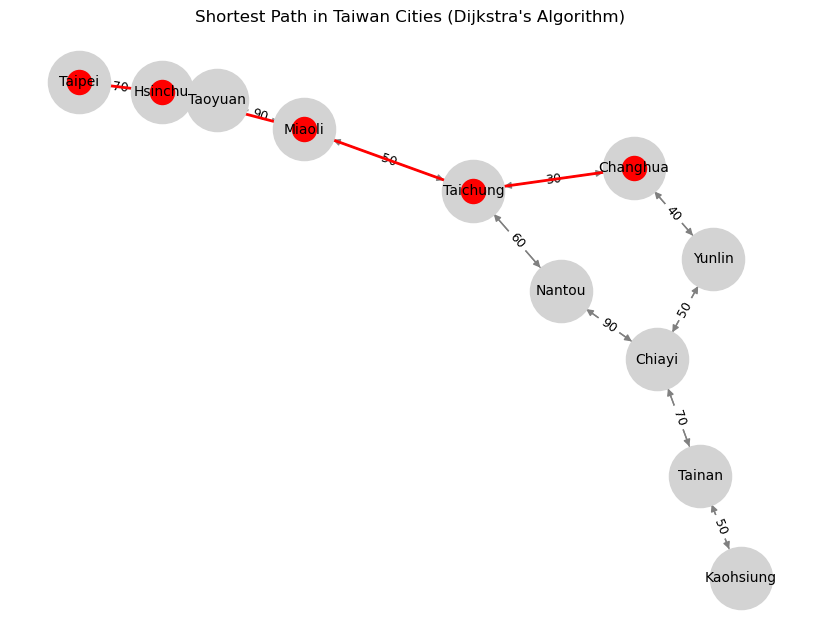

In [3]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# Define the graph: nodes and edges with costs
graph = {
    "Taipei": {"Taoyuan": 30, "Hsinchu": 70},
    "Taoyuan": {"Taipei": 30, "Hsinchu": 50, "Miaoli": 90},
    "Hsinchu": {"Taipei": 70, "Taoyuan": 50, "Miaoli": 40},
    "Miaoli": {"Taoyuan": 90, "Hsinchu": 40, "Taichung": 50},
    "Taichung": {"Miaoli": 50, "Changhua": 30, "Nantou": 60},
    "Changhua": {"Taichung": 30, "Yunlin": 40},
    "Nantou": {"Taichung": 60, "Chiayi": 90},
    "Yunlin": {"Changhua": 40, "Chiayi": 50},
    "Chiayi": {"Nantou": 90, "Yunlin": 50, "Tainan": 70},
    "Tainan": {"Chiayi": 70, "Kaohsiung": 50},
    "Kaohsiung": {"Tainan": 50},
}

# Function to find the shortest path using Dijkstra's algorithm
def shortest_path(graph, start, end):
    priority_queue = [(0, start)]
    visited = set()
    costs = {node: float("inf") for node in graph}
    costs[start] = 0
    path = {}

    while priority_queue:
        current_cost, current_node = heapq.heappop(priority_queue)

        if current_node in visited:
            continue
        visited.add(current_node)

        for neighbor, weight in graph[current_node].items():
            total_cost = current_cost + weight
            if total_cost < costs[neighbor]:
                costs[neighbor] = total_cost
                path[neighbor] = current_node
                heapq.heappush(priority_queue, (total_cost, neighbor))

    # Backtrack to find the full path
    full_path = []
    current = end
    while current in path:
        full_path.append(current)
        current = path[current]
    full_path.append(start)
    full_path.reverse()

    return costs[end], full_path

# Function to visualize the full graph
def visualize_full_graph(graph):
    G = nx.DiGraph()
    
    for node, neighbors in graph.items():
        for neighbor, weight in neighbors.items():
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G)  # Positioning nodes for better visualization
    plt.figure(figsize=(8, 6))

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color='lightgray', edge_color='gray', node_size=2000, font_size=10)
    edge_labels = {(node, neighbor): graph[node][neighbor] for node in graph for neighbor in graph[node]}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

    plt.title("Full Graph of Taiwan Cities")
    plt.show()

# Function to visualize the shortest path
def visualize_shortest_path(graph, shortest_path):
    G = nx.DiGraph()
    
    # Add all edges
    for node, neighbors in graph.items():
        for neighbor, weight in neighbors.items():
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G)
    plt.figure(figsize=(8, 6))

    # Draw all edges in gray
    nx.draw(G, pos, with_labels=True, node_color='lightgray', edge_color='gray', node_size=2000, font_size=10)
    edge_labels = {(node, neighbor): graph[node][neighbor] for node in graph for neighbor in graph[node]}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

    # Highlight the shortest path in red
    path_edges = list(zip(shortest_path, shortest_path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
    nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color='red')

    plt.title("Shortest Path in Taiwan Cities (Dijkstra's Algorithm)")
    plt.show()

# Input: Start and End locations
print("Available cities:", list(graph.keys()))
start_location = input("Enter the start city: ")
end_location = input("Enter the destination city: ")

# Validate input
if start_location not in graph or end_location not in graph:
    print("Invalid city entered. Please try again with valid city names.")
else:
    # Show full graph first
    visualize_full_graph(graph)

    # Call the function to calculate the shortest path
    cost, route = shortest_path(graph, start_location, end_location)

    # Print results
    print(f"Shortest Path Cost: {cost}")
    print(f"Path: {' -> '.join(route)}")

    # Show shortest path graph
    visualize_shortest_path(graph, route)
